# Computer Vision Basics

### Haar Cascade Classifier
It is an Object Detection Algorithm used to identify faces in an image or a real time video. The algorithm uses edge or line detection features proposed by Viola and Jones in their research paper “Rapid Object Detection using a Boosted Cascade of Simple Features” published in 2001. The algorithm is given a lot of positive images consisting of faces, and a lot of negative images not consisting of any face to train on them.

### Features


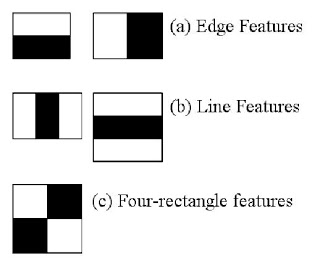

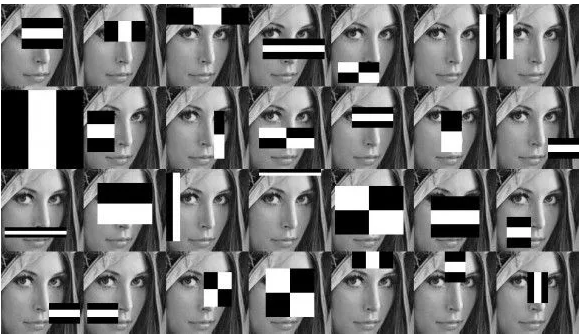

The first contribution to the research was the introduction of the haar features shown above. These features on the image makes it easy to find out the edges or the lines in the image, or to pick areas where there is a sudden change in the intensities of the pixels.

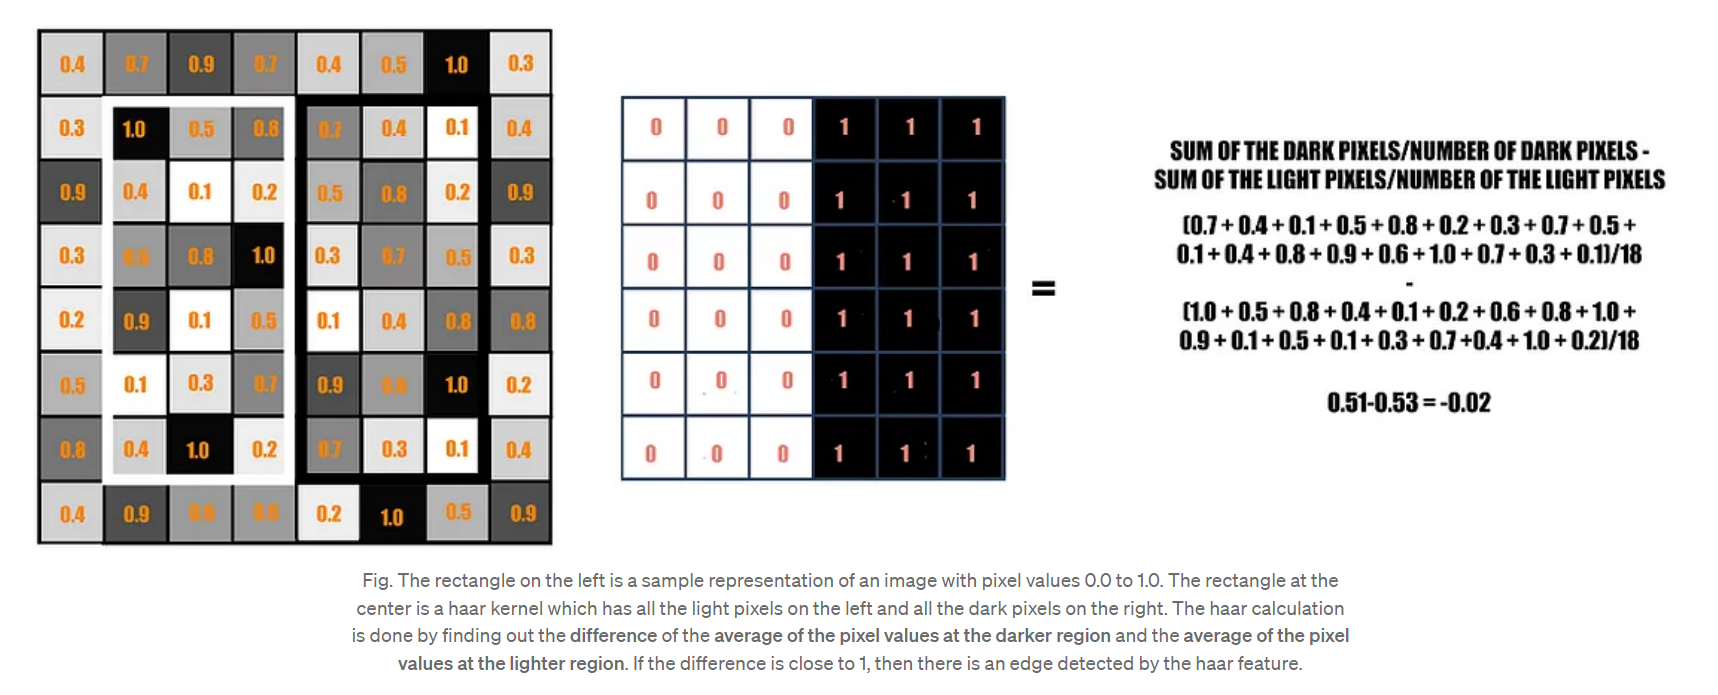

A sample calculation of Haar value from a rectangular image section has been shown here. The darker areas in the haar feature are pixels with values 1, and the lighter areas are pixels with values 0. Each of these is responsible for finding out one particular feature in the image. Such as an edge, a line or any structure in the image where there is a sudden change of intensities. For ex. in the image above, the haar feature can detect a vertical edge with darker pixels at its right and lighter pixels at its left.

The objective here is to find out the sum of all the image pixels lying in the darker area of the haar feature and the sum of all the image pixels lying in the lighter area of the haar feature. And then find out their difference. **Now if the image has an edge separating dark pixels on the right and light pixels on the left, then the haar value will be closer to 1**. That means, we say that there is an edge detected if the haar value is closer to 1. In the example above, there is no edge as the haar value is far from 

This is just one representation of a particular haar feature separating a vertical edge. Now there are other haar features as well, which will detect edges in other directions and any other image structures. To detect an edge anywhere in the image, the haar feature needs to traverse the whole image.1
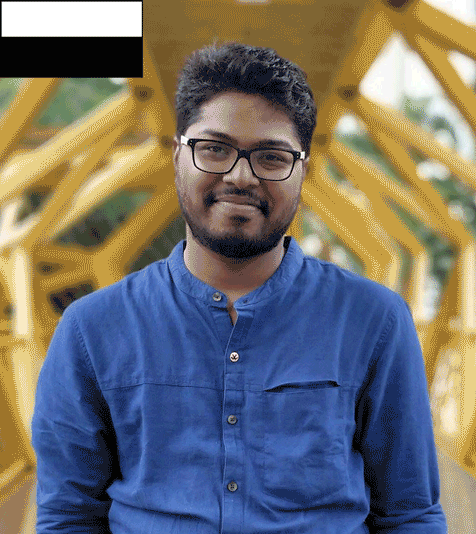

The haar feature continuously traverses from the top left of the image to the bottom right to search for the particular feature. This is just a representation of the whole concept of the haar feature traversal. In its actual work, the haar feature would traverse pixel by pixel in the image. Also all possible sizes of the haar features will be applied.

Depending on the feature each one is looking for, these are broadly classified into three categories. The first set of two rectangle features are responsible for finding out the edges in a horizontal or in a vertical direction (as shown above). The second set of three rectangle features are responsible for finding out if there is a lighter region surrounded by darker regions on either side or vice-versa. The third set of four rectangle features are responsible for finding out change of pixel intensities across diagonals.

Now, the haar features traversal on an image would involve a lot of mathematical calculations. As we can see for a single rectangle on either side, it involves 18 pixel value additions (for a rectangle enclosing 18 pixels). Imagine doing this for the whole image with all sizes of the haar features. This would be a hectic operation even for a high performance machine
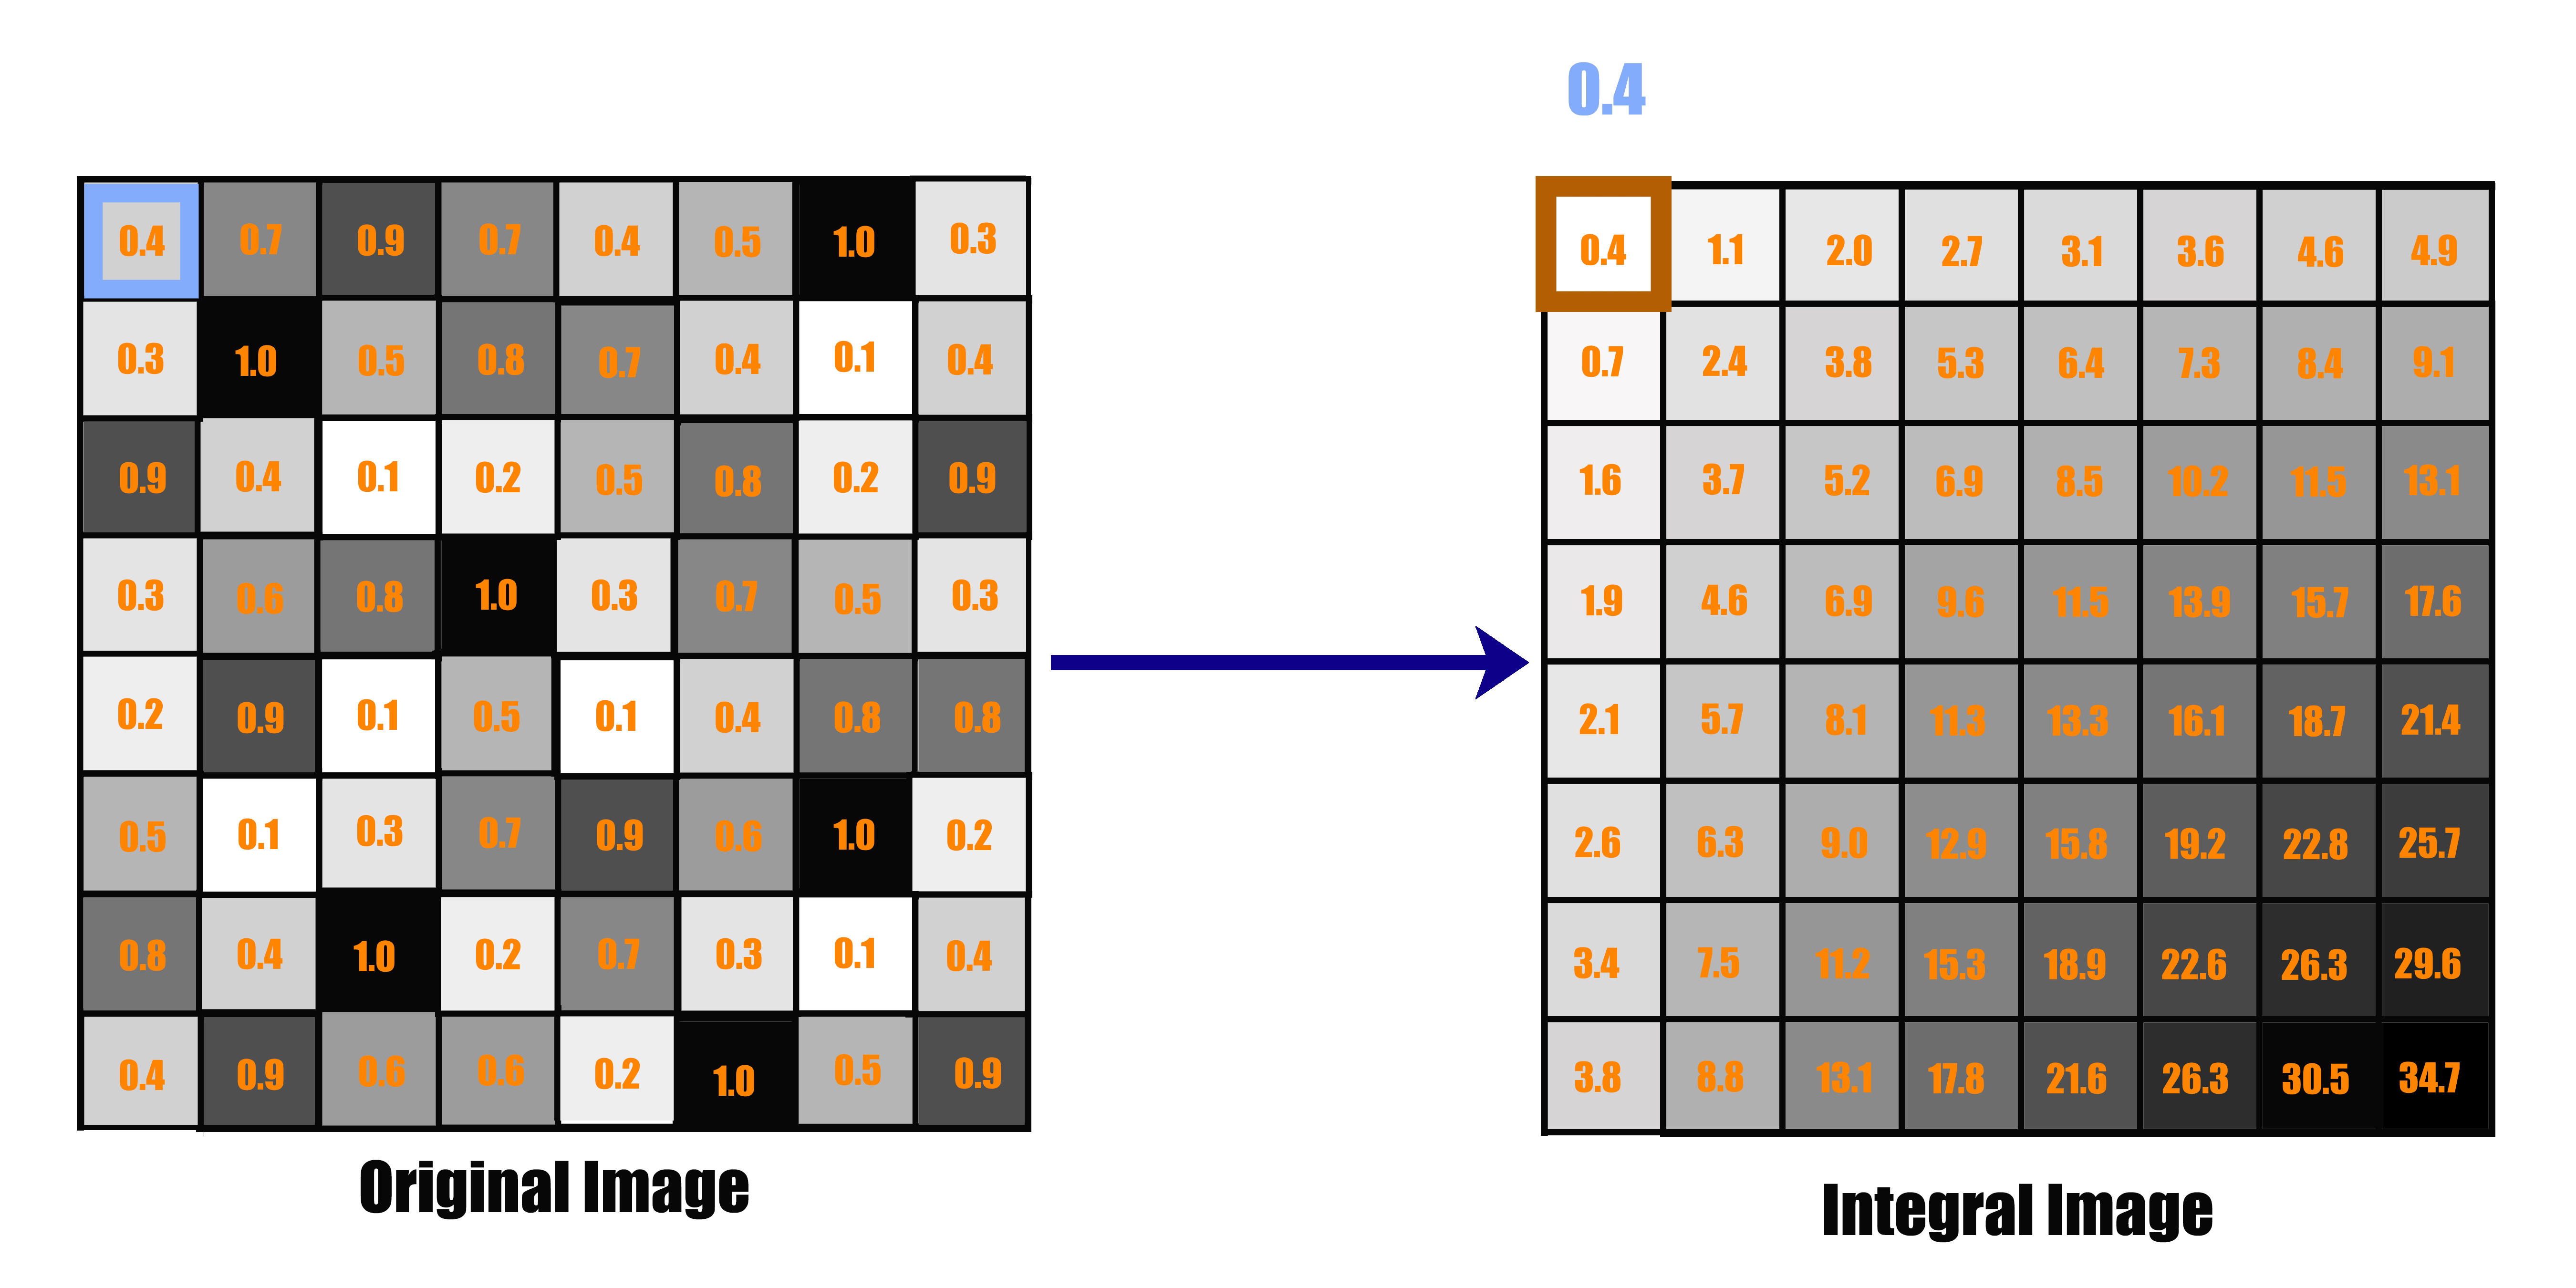

To tackle this, they introduced another concept known as **The Integral Image** to perform the same operation. An Integral Image is calculated from the Original Image in such a way that each pixel in this is the sum of all the pixels lying in its left and above in the Original Image. The calculation of a pixel in the Integral Image can be seen in the above GIF. The last pixel at the bottom right corner of the Integral Image will be the sum of all the pixels in the Original Image.

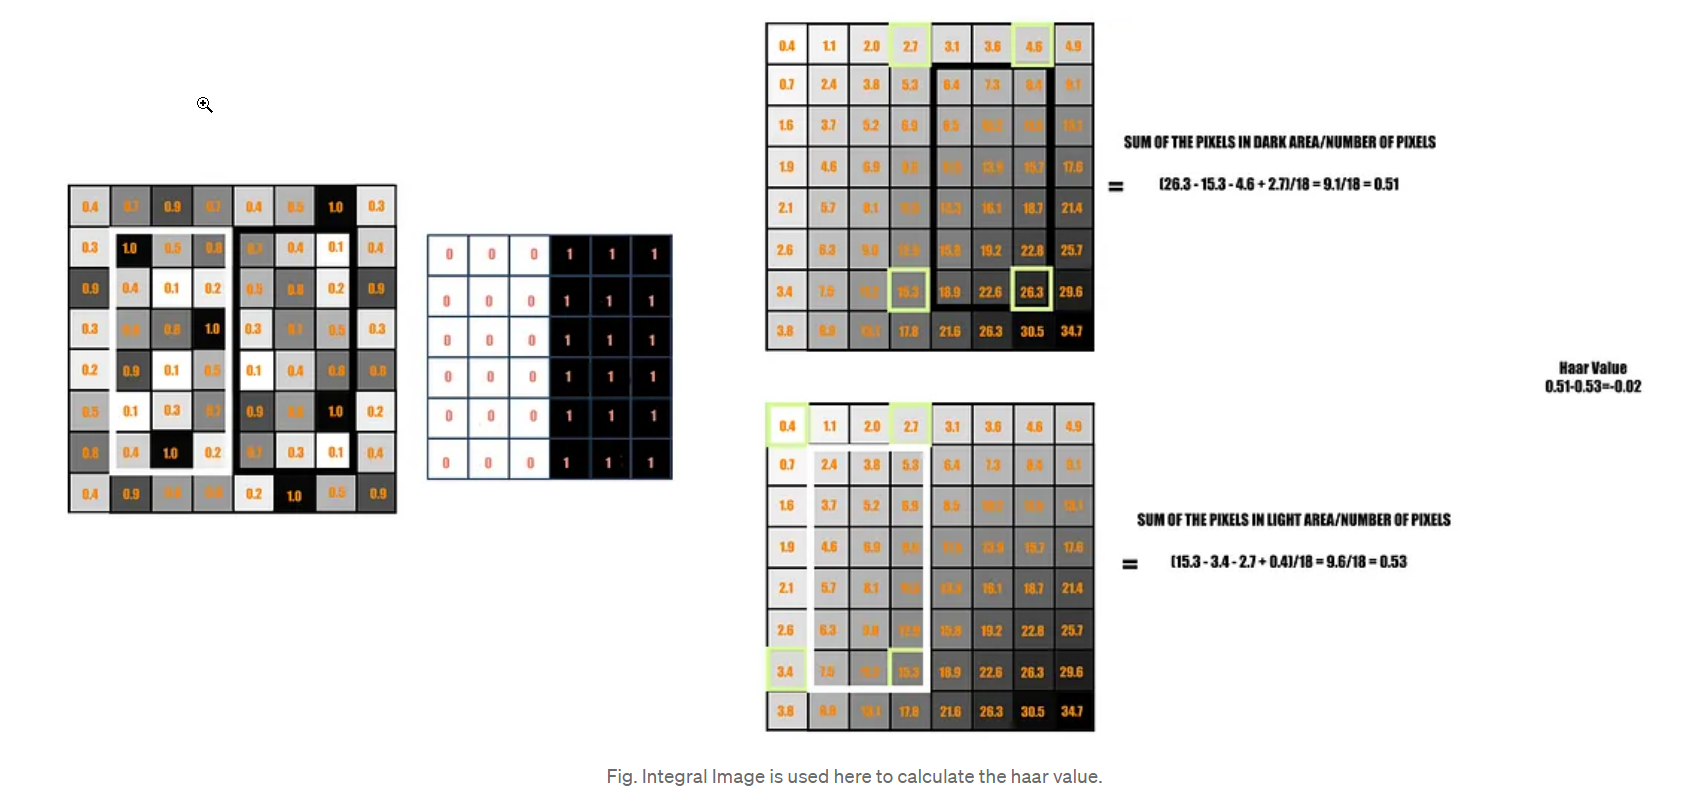

With the Integral Image, only 4 constant value additions are needed each time for any feature size (with respect to the 18 additions earlier). This reduces the time complexity of each addition gradually, as the number of additions does not depend on the number of pixels enclosed anymore.

In the above image, there is no edge in the vertical direction as the haar value is -0.02, which is very far from 1. Let’s see one more example, where there might be an edge present in the image.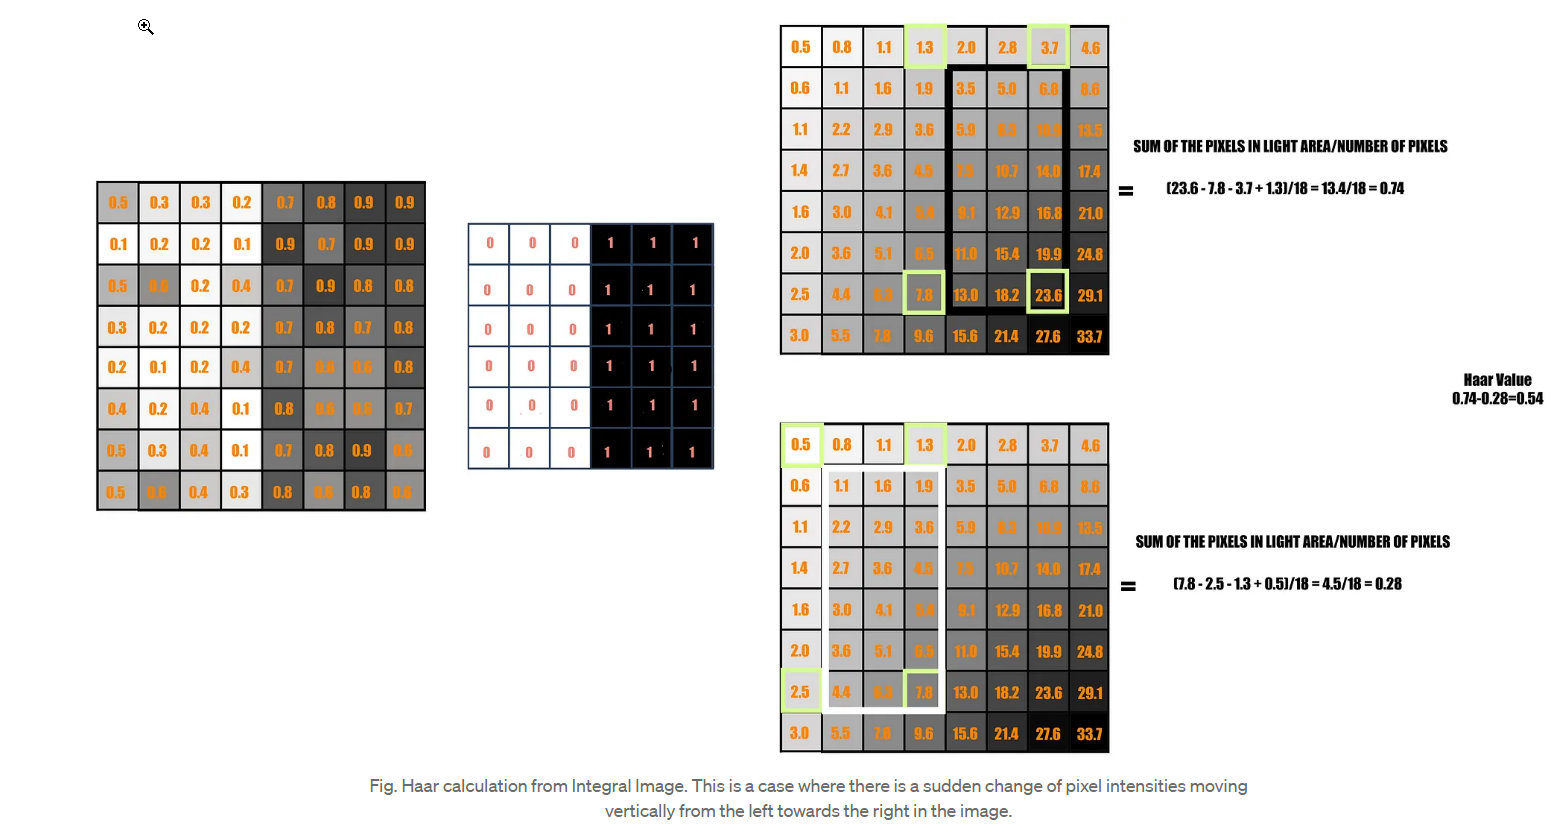

Again repeating the same calculation done above, but this time just to see what haar value is calculated when there is a sudden change of intensities moving from left to right in a vertical direction. The haar value here is 0.54, which is closer to 1 in comparison to the case earlier.
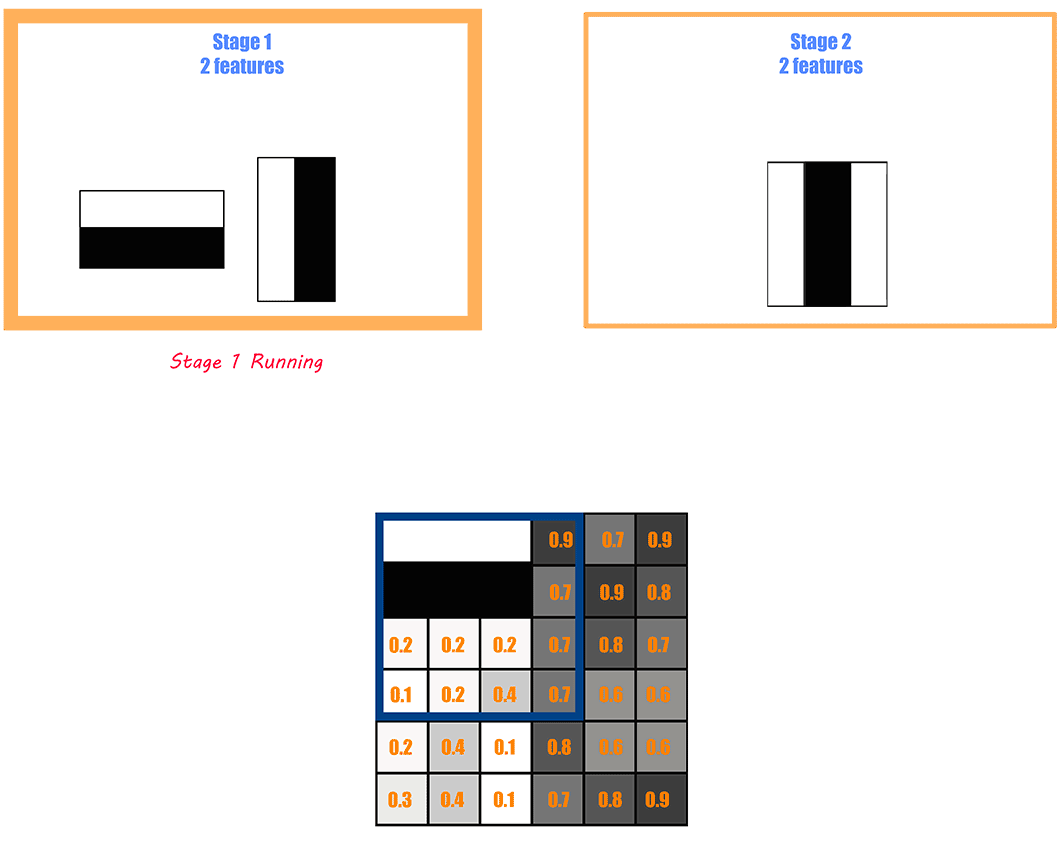

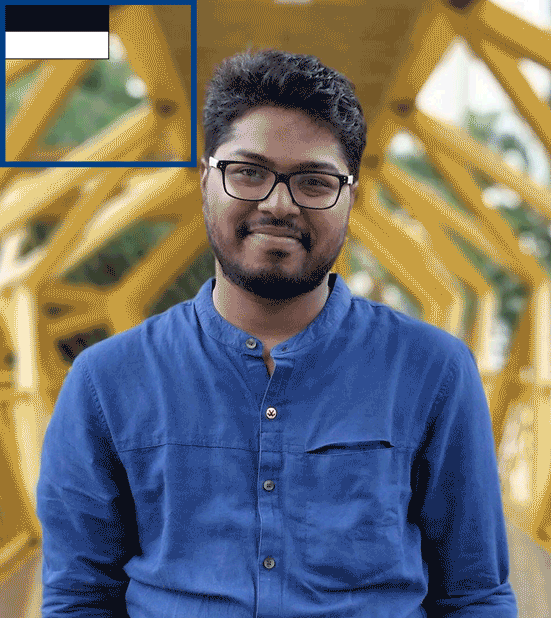


..

# BASICS

In [1]:
import cv2

In [2]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.1 MB 379.3 kB/s eta 0:01:41
   ---------------------------------------- 0.1/38.1 MB 379.3 kB/s eta 0:01:41
   ---------------------------------------- 0.1/38.1 MB 379.3 kB/s eta 0:01:41
   ---------------------------------------- 0.1/38.1

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [7]:
image = cv2.imread('7.png')


In [8]:
cv2.imshow('image_flower',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:973: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [4]:
cv2.imwrite('2.jpg',image)


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:798: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [5]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imshow('grey',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [6]:
cv2.imwrite('Edge.jpg',cv2.Canny(image,200,300))

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:798: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [8]:
cv2.imshow('Edges', cv2.imread('Edge.jpg'))
cv2.waitKey(0)
cv2.destroyAllWindows()

### Face Detection

In [1]:
import cv2
import numpy as np

The OpenCV library manages a repository containing all popular haar cascades that can be used for:

- Human face detection
- Eye detection
- Nose / Mouth detection
- Vehicle detection

https://github.com/opencv/opencv/tree/master/data/haarcascades

In [2]:
face_detection =cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [3]:
img = cv2.imread('face.jpg')


In [4]:
cv2.imshow('face',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

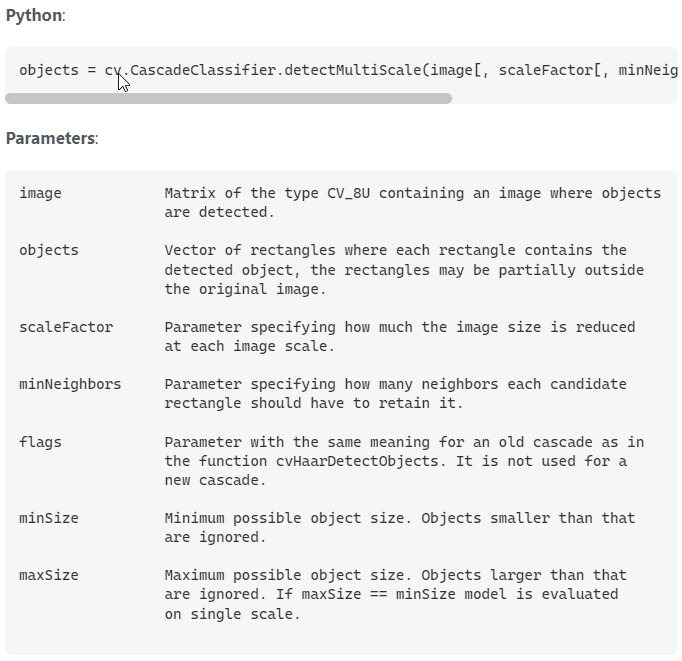

**MultiScale** detects objects of different sizes in the input image and returns rectangles positioned on the faces. The first argument is the image, the second is the scalefactor (how much the image size will be reduced at each image scale), and the third is the minNeighbors (how many neighbors each rectangle should have). The values of 1.3 and 5 are based on experimenting and choosing those that worked best.

In [7]:
faces = face_detection.detectMultiScale(grey, 1.3, 5)

- **faces** - It contains the coordinates of bounding boxes around detected faces.
- **detectMultiScale** - This method only accepts grayscale pictures.
- **cv2.rectangle** - This method draws rectangles (bounding boxes around the detected face).
- **scaleFactor = 1.3** - We can try a number between 1 and 2 and later fine-tune it.

**for (x, y, w, h) in faces**: We will loop through each rectangle (each face detected) using its coordinates generated by the function we discussed above.

**cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)** We are drawing the rectangle in the original image that we are capturing in the camera (last frame). the (255,0,0) is the color of the frame in RGB. The last parameter (2) is the thickness of the rectangle. x is the horizontal initial position, w is the width, y is the vertical initial position, h is the height.

**roi_gray = gray[y:y+h, x:x+w]** Here we are setting roi_gray to be our region of interest. That’s where we will look for the eyes.

**roi_color = frame[y:y+h, x:x+w]** We are getting the region of interest in the original frame (colored, not black & white).

In [8]:

for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w, y+h),(255,0,0),3)
cv2.imwrite('Face_AB.jpg',img)

True

In [9]:
cv2.imshow('dhashamoolam',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# DETECT FACE FROM VIDEO

In [2]:
# Necessary imports
import cv2
import numpy as np

In [3]:
# Loading the image
img = cv2.imread("girl.jpg")
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Creating an object faces
faces= face_cascade.detectMultiScale (gray, 1.3, 5)
# Drawing rectangle around the face
for(x , y,  w,  h) in faces:
    cv2.rectangle(img, (x,y) ,(x+w, y+h), (0,255,0), 3)
  

In [6]:
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
# Creating two objects of interest
roi_gray=gray[y:(y+h), x:(x+w)]
roi_color=img[y:(y+h), x:(x+w)]

In [8]:
eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 10)
for (x_eye, y_eye, w_eye, h_eye) in eyes:
  cv2.rectangle(roi_color,(x_eye, y_eye),(x_eye+w_eye, y_eye+h_eye), (0, 0, 255), 3) 


In [9]:
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
   # detecting smile within the face roi
smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)
if len(smiles) > 0:
    print("smile detected")
    for (sx, sy, sw, sh) in smiles:
        cv2.rectangle(roi_color, (sx, sy), ((sx + sw), (sy + sh)), (255, 0, 130), 2)
        cv2.putText(roi_color, "smile", (sx, sy),
        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
else:
    print("smile not detected")

smile detected


In [11]:
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
import numpy as np
import cv2

# multiple cascades: https://github.com/Itseez/opencv/tree/master/data/haarcascades

#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')

cap = cv2.VideoCapture(0)

while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
            
        smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)
        if len(smiles) > 0:
            print("smile detected")
            for (sx, sy, sw, sh) in smiles:
                cv2.rectangle(roi_color, (sx, sy), ((sx + sw), (sy + sh)), (255, 0, 130), 2)
                cv2.putText(roi_color, "smile", (sx, sy),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        else:
            print("smile not detected")

    cv2.imshow('img',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not detected
smile not de

KeyboardInterrupt: 

**cap = cv2.VideoCapture(0)** Here we are accessing your camera. When the parameter is 0, we are accessing an internal camera from your computer. When the parameter is 1, we are accessing an external camera that is plugged on your computer.

**while True**: We will keep running the detect function with the code that follows while the camera is opened (until we close it using a key that we will define).

**_, frame = video_capture.read()** the read() function will return 2 objects, but we are interested only in the latest one, that is the last frame from the camera. So we are ignoring the first object _, and naming the second as frame, that we will use to feed our detect() function in a second.

**gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)** We are getting the frame we just read from the function above and converting it to grayscale. We are naming it gray and we will use to feed our detect function as well.

**k= cv2.waiKey(1) & 0xFF == ord('q')** : break This piece of code will stop the program when you press q on the keyboard.